# **Heart Disease Prediction-Group_1**

---
[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 


---


*14 Attributes used:*
1. (age) 		: age in years
2. (sex) 		: (1 = male; 0 = female)
3. (cp)			: (1 = typical angina, 2= atypical angina, 3 = non-anginal pain)
4. (trestbps) 	: resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) 		: serum cholestoral in mg/dl
6. (fbs)		: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg)	: (0 = normal, 1 = abnormality ST > 0.05 mV , 2 )
8. (thalach)	: maximum heart rate achieved
9. (exang)		: exercise induced angina (1 = yes; 0 = no)
10. (oldpeak)	: ST depression induced by exercise relative to rest
11. (slope)		: the slope of the peak exercise ST segment ( 1 : upsloping , 2: flat , 3: downsloping ) 
12. (ca)		: number of major vessels (0-3) colored by flourosopy
13. (thal)		: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute)


---



### ***Data Exploration***

Importing Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# evaluate iterative imputation and random forest
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from numpy import isnan
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import os
import warnings

warnings.filterwarnings('ignore')



Loading the datasets for Cleaveland, Hungaria, Switzerland, and Virginia

In [ ]:
cleveland_file = "C:/Users/smsab/Desktop/UCF/CAP - 5610/Final project/processed.cleveland.data"
cleveland_df = pd.read_csv(cleveland_file, header=None)
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df = cleveland_df.replace('?', np.nan)

hungarian_file = "C:/Users/smsab/Desktop/UCF/CAP - 5610/Final project/processed.hungarian.data"
hungarian_df = pd.read_csv(hungarian_file, header=None)
hungarian_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hungarian_df = hungarian_df.replace('?', np.nan)

switzerland_file = "C:/Users/smsab/Desktop/UCF/CAP - 5610/Final project/processed.switzerland.data"
switzerland_df = pd.read_csv(switzerland_file, header=None)
switzerland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
switzerland_df = switzerland_df.replace('?', np.nan)

va_file = "C:/Users/smsab/Desktop/UCF/CAP - 5610/Final project/processed.va.data"
va_df = pd.read_csv(va_file, header=None)
va_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
va_df = va_df.replace('?', np.nan)

FileNotFoundError: ignored

ITERATIVE IMPUTING ON CLEVELAND DATASET

In [ ]:
def optimize_IterativeImputer_imputer(data, target):
    results = list()
    for s in ['ascending', 'descending', 'roman', 'arabic', 'random']:
        #imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        imputer = IterativeImputer(imputation_order=s)
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #Converting Target Variables to Binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        print(' %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))              
    plt.boxplot(results, labels=['ascending', 'descending', 'roman', 'arabic', 'random'], showmeans=True)
    plt.show()

 ascending --> Mean : 0.824 --> Std : (0.055)
 descending --> Mean : 0.823 --> Std : (0.057)
 roman --> Mean : 0.822 --> Std : (0.045)
 arabic --> Mean : 0.824 --> Std : (0.058)
 random --> Mean : 0.826 --> Std : (0.053)


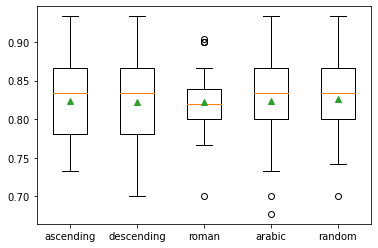

In [ ]:
optimize_IterativeImputer_imputer(cleveland_df,'num')

In [ ]:
# Print the best score and parameter
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

ITERATING IMPUTING ON CLEVELAND, HUNGARIAN, SWITZERLAND, AND SWITZERLAND

In [1]:
#Complete dataset
Heart_Disease_DF = pd.concat([cleveland_df,hungarian_df,switzerland_df,va_df])

NameError: ignored

 ascending --> Mean : 0.833 --> Std : (0.035)
 descending --> Mean : 0.836 --> Std : (0.030)
 roman --> Mean : 0.833 --> Std : (0.031)
 arabic --> Mean : 0.836 --> Std : (0.033)
 random --> Mean : 0.836 --> Std : (0.033)


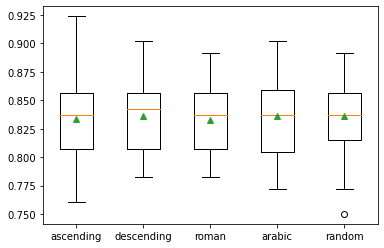

In [ ]:
optimize_IterativeImputer_imputer(Heart_Disease_DF,'num')

ITERATIVE IMPUTING ON CLEVELAND AND HUNGARIAN

In [ ]:
Clev_hung_df = pd.concat([cleveland_df,hungarian_df])

 ascending --> Mean : 0.831 --> Std : (0.041)
 descending --> Mean : 0.834 --> Std : (0.042)
 roman --> Mean : 0.834 --> Std : (0.046)
 arabic --> Mean : 0.839 --> Std : (0.048)
 random --> Mean : 0.834 --> Std : (0.043)


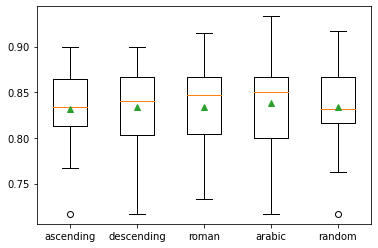

In [ ]:
optimize_IterativeImputer_imputer(Clev_hung_df,'num')

ITERATIVE IMPUTING ON CLEVELAND AND SWITZERLAND

In [ ]:
Clev_switz_df = pd.concat([cleveland_df,switzerland_df])

 ascending --> Mean : 0.860 --> Std : (0.057)
 descending --> Mean : 0.850 --> Std : (0.063)
 roman --> Mean : 0.848 --> Std : (0.065)
 arabic --> Mean : 0.850 --> Std : (0.057)
 random --> Mean : 0.851 --> Std : (0.056)


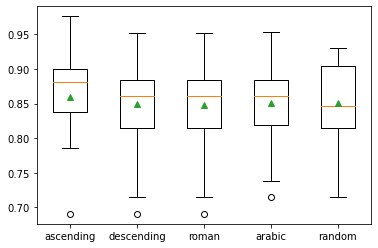

In [ ]:
optimize_IterativeImputer_imputer(Clev_switz_df,'num')

ITERATIVE IMPUTING ON CLEVELAND, HUNGARIAN, AND SWITZERLAND

In [ ]:
Clev_hung_switz_df = pd.concat([cleveland_df,hungarian_df,switzerland_df])

 ascending --> Mean : 0.856 --> Std : (0.028)
 descending --> Mean : 0.855 --> Std : (0.031)
 roman --> Mean : 0.852 --> Std : (0.033)
 arabic --> Mean : 0.850 --> Std : (0.036)
 random --> Mean : 0.854 --> Std : (0.030)


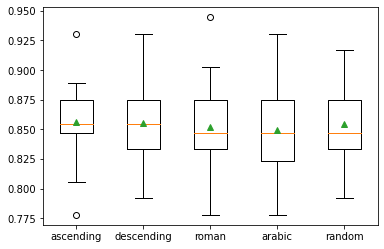

In [ ]:
optimize_IterativeImputer_imputer(Clev_hung_switz_df,'num')